In [10]:
bootstrap = function(data, n, size) {
    bootstrapped_dataset = data.frame()

    for (i in 1:n) {
        boot_sample = data[sample(nrow(data), size, replace = TRUE), ]
        boot_sample$BootstrapID = i  
        bootstrapped_dataset = rbind(bootstrapped_dataset, boot_sample)
    }

    return(bootstrapped_dataset)
}


# Assignment 3
[data link](https://app.box.com/s/7qv44umhw0vnzgmoe9krfkfkv5kf2atv)
## 1.The data file diabetes.csv contains data of 768 patients. In this data there are 8 attributes (Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, and Age) and 1 response variable (Outcome). The response variable, Outcome, has binary value (1 indicating the outcome is diabetes and 0 means no diabetes). For this assignment purposes we will consider this data as a population. Use this data to perform the following:

In [22]:
library(ggplot2)
df = read.csv('/kaggle/input/diabetes/diabetes.csv')
df

Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
5,116,74,0,0,25.6,0.201,30,0
3,78,50,32,88,31.0,0.248,26,1
10,115,0,0,0,35.3,0.134,29,0
2,197,70,45,543,30.5,0.158,53,1


### a) set a seed (to ensure work reproducibility) and take a random sample of 25 observations and find the mean Glucose and highest Glucose values of this sample and compare these statistics with the population statistics of the same variable. You should use charts for this comparison. (5 points)

Population mean:  120.8945 
Sample mean:  129.6 
Population max:  199 
Sample max:  193 


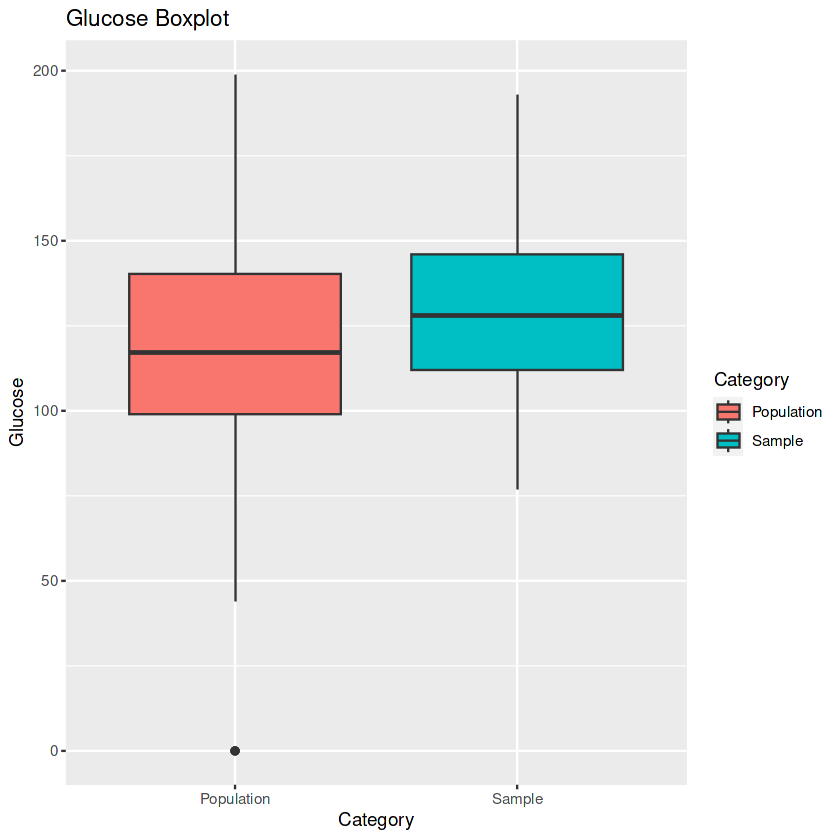

In [5]:
set.seed(42)
sample_df = df[sample(nrow(df), 25),]
sample_df$Category = 'Sample'
df$Category = 'Population'
lst = c('Glucose', 'Category')
comb_df = rbind(df[, lst], sample_df[,lst])
cat("Population mean: ", mean(df$Glucose),"\n")
cat("Sample mean: ", mean(sample_df$Glucose), "\n")
cat("Population max: ", max(df$Glucose), "\n")
cat("Sample max: ", max(sample_df$Glucose), "\n")
ggplot(comb_df, aes(x=Category, y=Glucose, fill=Category))+geom_boxplot()+labs(title="Glucose Boxplot", x="Category", y="Glucose")

While the variation in the sample is smaller, it's biased much higher with a mean of 129.6 vs 120.9 for the population.  Additionally, the population has higher highs and lower lows. Finally, the population appears to have an erroneous value of blood glucose equal to zero.

### b) Find the 98th percentile of BMI of your sample and the population and compare the results using charts. (5 points)

In [7]:
samp_98 = quantile(sample_df$BMI, .98)
pop_98 = quantile(df$BMI, .98)
bmi_df = data.frame(rows=c("Sample", "Population"), quantiles = c(samp_98, pop_98))
bmi_df

rows,quantiles
<chr>,<dbl>
Sample,44.100
Population,47.526


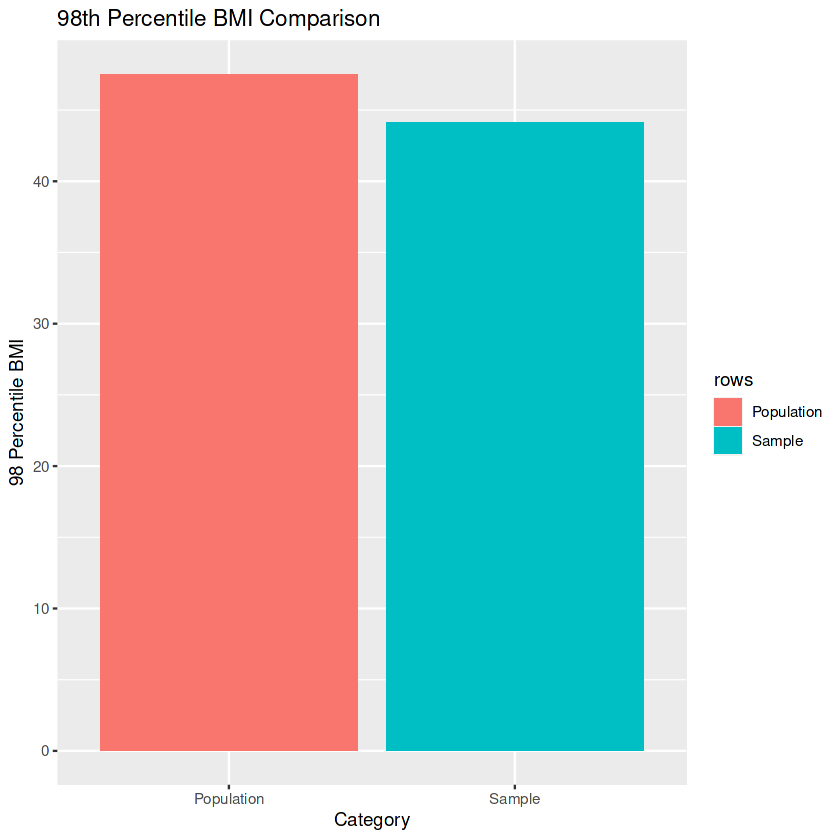

In [8]:
ggplot(bmi_df, aes(x=rows, y=quantiles, fill = rows))+geom_bar(stat='identity')+labs(title="98th Percentile BMI Comparison", x = 'Category', y= "98 Percentile BMI")

Similarly to the reasoning in part a,the sample has a lower 98th percentile since a sample is less likely to contain values at the tails of the distribuiton.

### c) Using bootstrap (replace= True), create 500 samples (of 150 observation each) from the population and find the average mean, standard deviation and percentile for BloodPressure and compare this with these statistics from the population for the same variable. Again, you should create charts for this comparison. Report on your findings. (10 points)

In [26]:
bs = bootstrap(df, 500, 150)

Category,Mean,SD,percentile_95
<chr>,<dbl>,<dbl>,<dbl>
Bootstrap,69.17715,19.31061,92
Population,69.10547,19.35581,90


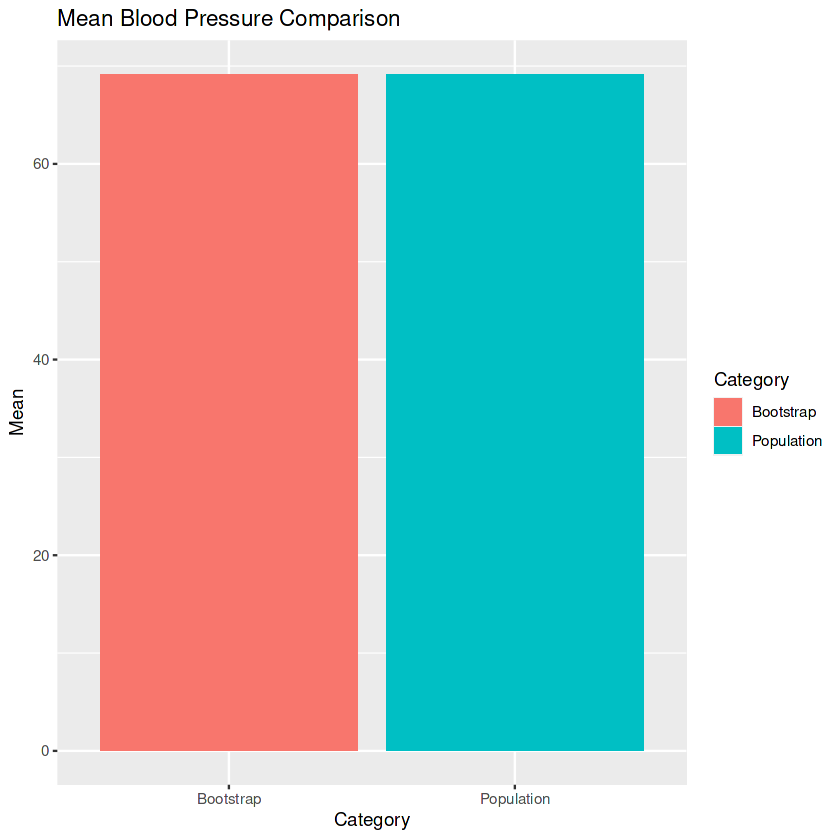

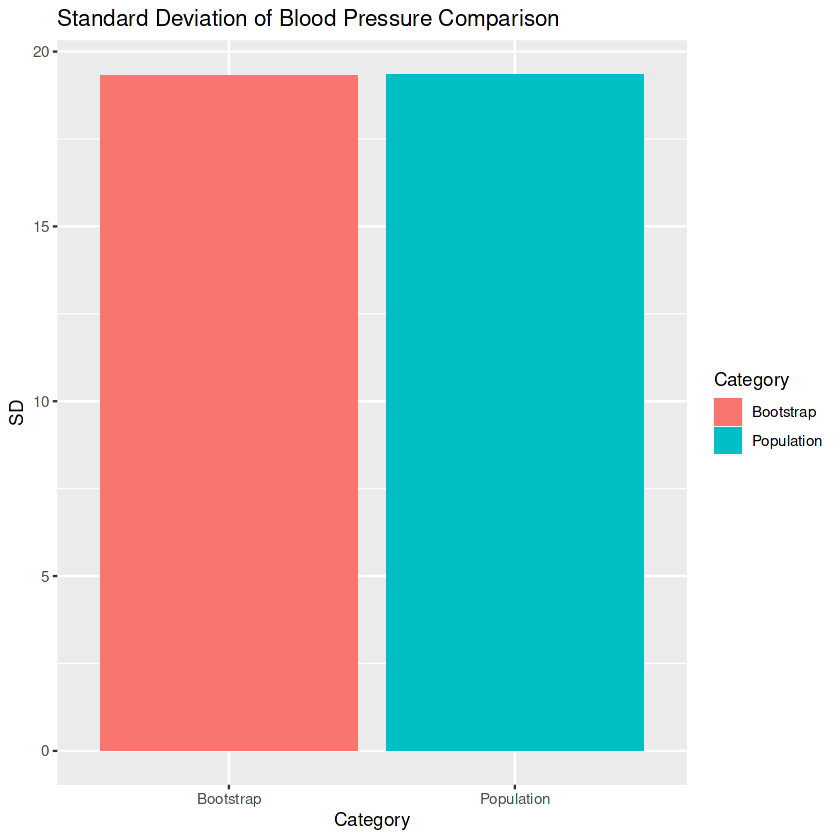

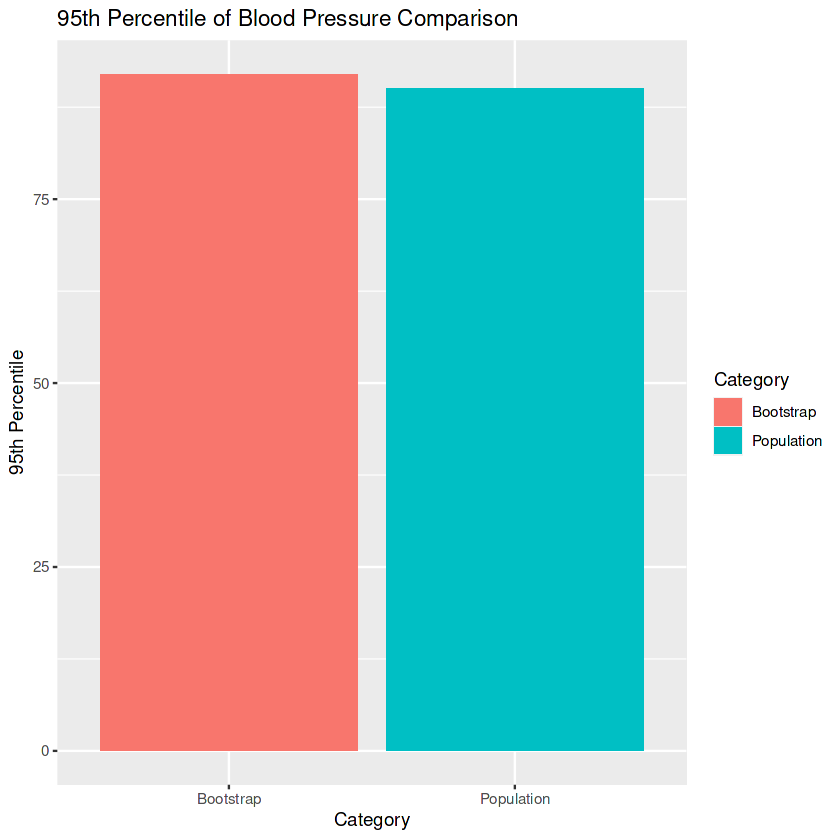

In [21]:
dfbp=df$BloodPressure
popmean=mean(dfbp)
popsd=sd(dfbp)
pop95=quantile(dfbp, .95)
bsbp=bs$BloodPressure
bsmean=mean(bsbp)
bssd=sd(bsbp)
bs95=quantile(bsbp, .95)

bp_df = data.frame(
    Category=c('Bootstrap', 'Population'),
    Mean=c(bsmean, popmean),
    SD=c(bssd, popsd),
    percentile_95=c(bs95, pop95))

bp_df

ggplot(bp_df, aes(x = Category, y = Mean, fill = Category)) +
  geom_bar(stat = "identity") +
  labs(title = "Mean Blood Pressure Comparison", x = "Category", y = "Mean")

ggplot(bp_df, aes(x = Category, y = SD, fill = Category)) +
  geom_bar(stat = "identity") +
  labs(title = "Standard Deviation of Blood Pressure Comparison", x = "Category", y = "SD")

ggplot(bp_df, aes(x = Category, y = percentile_95, fill = Category)) +
  geom_bar(stat = "identity") +
  labs(title = "95th Percentile of Blood Pressure Comparison", x = "Category", y = "95th Percentile")

Here we are able to see the strenght of bootstrapped samples. The mean and variance are nearly identical in the population and sample.  There is a little over two percent diffence in the 95th percentile values, but it is still a very close approximation.  In this instance, we are able to sample from the entire population (for illustrative purpose) and the bootstrap sample is over two-thirds the size of the population.  Close concordance is to be expected.